# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
#South Call Center
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.rcParams['figure.figsize'] = (20,10)



# Create two new dataframes
south_df= pd.read_csv("/Users/leahjohnson/Desktop/LaunchCode/call-center-cleanup-assignment/SouthCallCenter.csv")
pd.set_option('display.max_rows',None)
south_df
north_df= pd.read_csv("/Users/leahjohnson/Desktop/LaunchCode/call-center-cleanup-assignment/NorthCallCenter.csv")
pd.set_option('display.max_rows',None)
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [2]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch? 
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
    

3. What is the number of calls taken for each time block?
SEE Tables below 

In [3]:
# 1.Put your EDA code here South Call Center
south_df['Rep ID'].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [4]:
north_df['Rep ID'].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [5]:
#2. SOUTH 
south_df['Busy Minutes'].mean()

10.054140127388536

In [6]:
south_df['During Call Wait Time'].mean()

3.0764331210191083

In [7]:
south_df['Incoming Wait Time'].mean()

3.0

In [8]:
#3
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [9]:
south_df['Not Ready Minutes'].mean()

1.910828025477707

In [10]:
#NORTH 2
north_df['Busy Minutes'].mean()

9.987755102040817

In [11]:
north_df['During Call Wait Time'].mean()

2.9673469387755103

In [12]:
north_df['Not Ready Minutes'].mean()

1.9142857142857144

In [13]:
north_df['During Call Wait Time'].mean()

2.9673469387755103

In [14]:
north_df['Incoming Wait Time'].mean()

3.048780487804878

In [15]:
#3
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
South CC- 11 reps
North CC- 9 reps
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
South:
    -Busy Minutes:10.05
    -Not ready minutes: 2.01
    -Incoming wait time: 3.0
    -During call wait time:3.1
North:
    -Busy Minutes: 10
    -Not ready minutes: 2.01
    -Incoming wait time: 3.05
    -During call wait time: 3.07
3. What is the number of calls taken for each time block?
South:
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5

North: 
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

# Cleaning South Call Center

Created new datafram, droped 'Unnamed'

In [16]:
s_df=south_df.drop(labels=None,axis=0,index=None,columns='Unnamed: 0',level=None,inplace=None,errors=None)
s_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [17]:
s_df.shape

(314, 14)

Located Column 'Incoming or Outing' and 'Incoming Wait Time' to see if there are any missing values and if they all corrlated with Outgoing CAlls which they need so it makes sense why they are missing.

In [18]:
#1
s_df.loc[(south_df['Incoming or Outgoing']=='Outgoing')&(south_df['Incoming Wait Time'].isnull())].head(50)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
126,South,Product Support,9:00 AM,Outgoing,C,Sandy,NO,1,0,12,2,NaN,4,1
127,South,Product Support,9:00 AM,Outgoing,C,Susan,NO,1,0,9,3,NaN,4,1
128,South,Product Support,9:00 AM,Outgoing,D,Karl,NO,1,0,9,3,NaN,4,1
129,South,Sales Support,10:00 AM,Outgoing,C,Susan,NO,1,0,8,2,NaN,4,1
130,South,Sales Support,11:00 AM,Outgoing,D,Josh,NO,1,0,9,2,NaN,4,1
131,South,Sales Support,12:00 PM,Outgoing,D,Josh,NO,1,0,12,1,NaN,3,1
132,South,Sales Support,12:00 PM,Outgoing,C,Sharon,NO,1,0,11,2,NaN,4,1
133,South,Product Support,1:00 PM,Outgoing,D,Randy,NO,1,0,9,1,NaN,3,1
134,South,Product Support,5:00 PM,Outgoing,D,Josh,NO,1,0,9,1,NaN,4,1
135,South,Product Support,5:00 PM,Outgoing,D,Randy,NO,1,0,9,3,NaN,2,1


Look for Duplicates in south dataframe and look at shape to confirm any changes and there wasnt 

In [19]:


s_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [20]:
s_df.shape

(314, 14)

# Cleaning NorthData Set

Cleaned up data frame took away 'unnamed'

In [22]:
n_df=north_df.drop(labels=None,axis=0,index=None,columns='Unnamed: 0',level=None,inplace=None,errors=None)
n_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


Check to see if ther are any null values

In [23]:
n_df.isnull()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Investigate values in the "Incoming Wait Time" column

In [24]:
n_df[n_df['Incoming Wait Time'].isnull()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,NaN,2,1
83,North,Sales Support,10:00 AM,Outgoing,B,Duke,NO,1,0,10,2,NaN,4,1
84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,NaN,4,1
85,North,Product Support,9:00 AM,Outgoing,B,Duke,NO,1,0,12,1,NaN,2,1
86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
88,North,Product Support,9:00 AM,Outgoing,A,Andy,NO,0,1,12,2,NaN,2,1
89,North,Product Support,11:00 AM,Outgoing,A,Amanda,NO,0,1,11,2,NaN,2,1
90,North,Sales Support,10:00 AM,Outgoing,B,Brent,NO,0,0,11,3,NaN,4,1
91,North,Sales Support,10:00 AM,Outgoing,B,Todd,NO,0,0,10,2,NaN,2,1


Check DF for duplicates, there are not

In [25]:
n_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)



,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [26]:
#Is any of the data in the two data sets unnecessary? If yes, how did you handle it? YES, dropped that column

north_df.drop(labels=None,axis=0,index=None,columns='Unnamed: 0',level=None,inplace=None,errors=None)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [27]:
#2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

Check to see if those yes values were outlies and they definetly are will drop them in the next code

<AxesSubplot:>

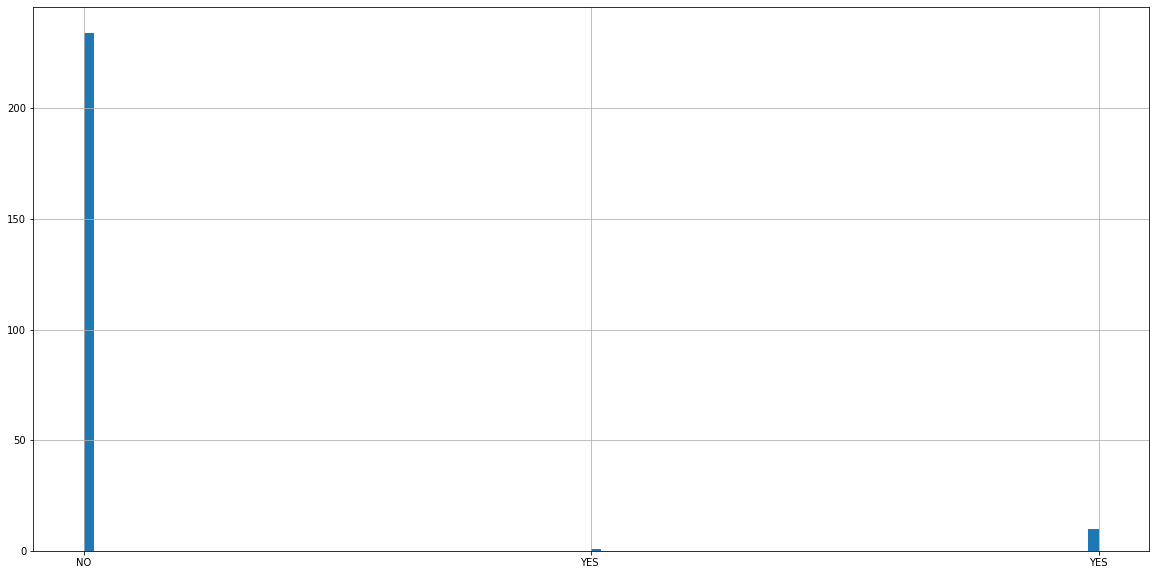

In [28]:
n_df['Sale'].hist(bins=100)



### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?


Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?


2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?


3. Are there duplicates in the two data sets? If there are, how did you handle them?


4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [29]:
# Manipulate data here

In [54]:
data=[n_df,s_df]
df=pd.concat(data)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [55]:
#1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
sumcallss=df.sort_values(['Rep ID','Calls'],ascending=False).groupby('Rep ID').sum()
sumcallss

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Alice,0,0,199,46,15.0,58,20
Amanda,0,1,229,43,12.0,60,23
Andy,0,3,228,43,36.0,65,23
Brent,0,1,362,71,17.0,117,37
Cam,1,0,233,46,32.0,66,24
Duke,2,0,292,56,39.0,85,29
Eric,0,0,361,54,47.0,112,35
George,0,0,298,53,41.0,87,29
Helga,0,2,292,58,36.0,95,31


In [56]:
df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False).head(20)

Rep ID
Brent     37
Eric      35
Randy     33
Sandy     32
Helga     31
Lilly     30
Todd      29
Duke      29
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Joe       26
Sharon    25
Xander    24
Cam       24
Amanda    23
Andy      23
Alice     20
Name: Calls, dtype: int64

In [57]:

#The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? Yes, S.CC was less than 2%
dfavs=df['Abandoned'].mean()

dfavs

0.01967799642218247

In [35]:
#3.Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
#S.CC has 38% of calls answered within 2 secs
drop_with_NA_south=south_df.dropna(axis=0,how='any')
less_than_two_south=drop_with_NA_south['Incoming Wait Time']<=2
less_than_two_south.value_counts(normalize=True).mul(100).astype(str)+'%'

False    61.904761904761905%
True     38.095238095238095%
Name: Incoming Wait Time, dtype: object

In [58]:
#3.Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
#S.CC has 38% of calls answered within 2 secs
drop_with_NA_south=df.dropna(axis=0,how='any')
less_than_two_south=drop_with_NA_south['Incoming Wait Time']<=2
less_than_two_south.value_counts(normalize=True).mul(100).astype(str)+'%'

False    61.057692307692314%
True      38.94230769230769%
Name: Incoming Wait Time, dtype: object

In [37]:
#3
frames=[north_df,south_df]
whole=pd.concat(frames)
whole
#whole_drop_NA=whole.dropna(axis=0,how='any')
less_than_two_whole=whole['Incoming Wait Time']<=2
less_than_two_whole.value_counts(normalize=True).mul(100).astype(str)+'%'


False      85.5098389982111%
True     14.490161001788909%
Name: Incoming Wait Time, dtype: object

In [38]:
speed_north=north_df['Incoming Wait Time'].sum()
speed_north

250.0

In [39]:
speed_south=south_df['Incoming Wait Time'].sum()
speed_south

378.0

In [59]:
speed=df['Incoming Wait Time'].sum()
speed

628.0

In [40]:
#For each branch and the entire company, what is the average speed of answer?
#North-250
#South 378
#whole company 628



In [41]:
dropped=north_df.drop(north_df[(north_df['Abandoned']==1)&(north_df['Lost Call']==1)].index)
sum_dropped=dropped['Calls'].sum()
sum_dropped

south_plt=south_df.groupby('Calls')['Incoming Wait Time'].mean().to_frame().reset_index()
south_plt

,Calls,Incoming Wait Time
0,1,3.0


In [42]:
north_plt = north_df.groupby("Calls")["Incoming Wait Time"].mean().to_frame().reset_index()
north_plt

,Calls,Incoming Wait Time
0,1,3.04878


In [43]:
whole_plt=whole.groupby('Calls')['Incoming Wait Time'].mean().to_frame().reset_index()
whole_plt

,Calls,Incoming Wait Time
0,1,3.019231


In [44]:
average_speed_north=speed_north/sum_dropped
average_speed_north

1.0204081632653061

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [45]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = whole.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [46]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

Text(0, 0.5, 'Abandonment Rate')

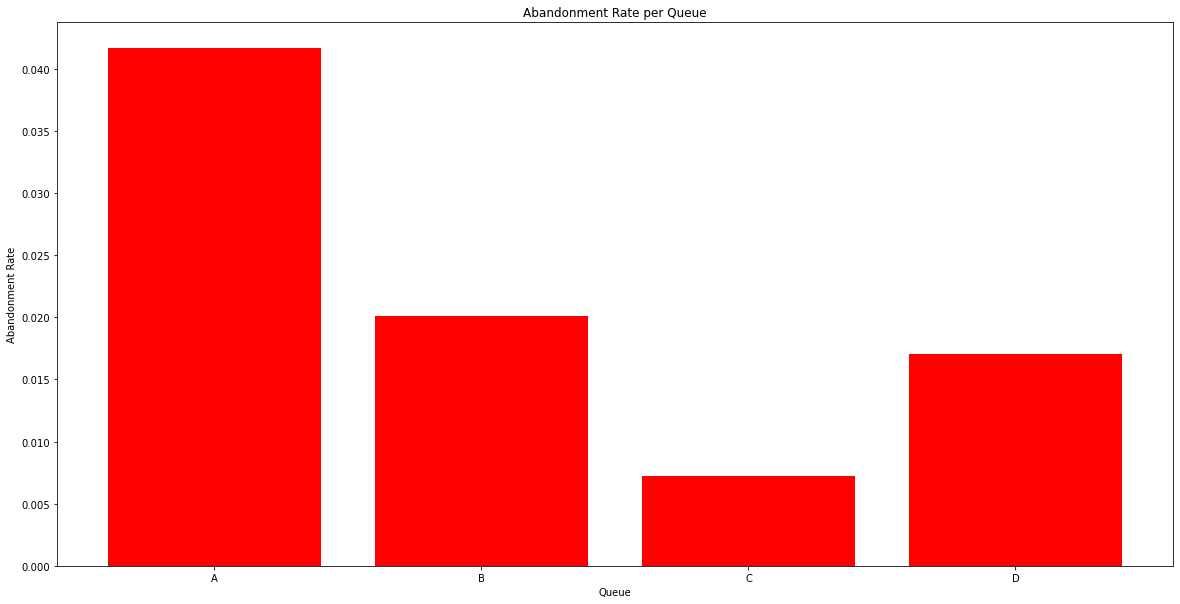

In [47]:
plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center',color='red')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.title('Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')

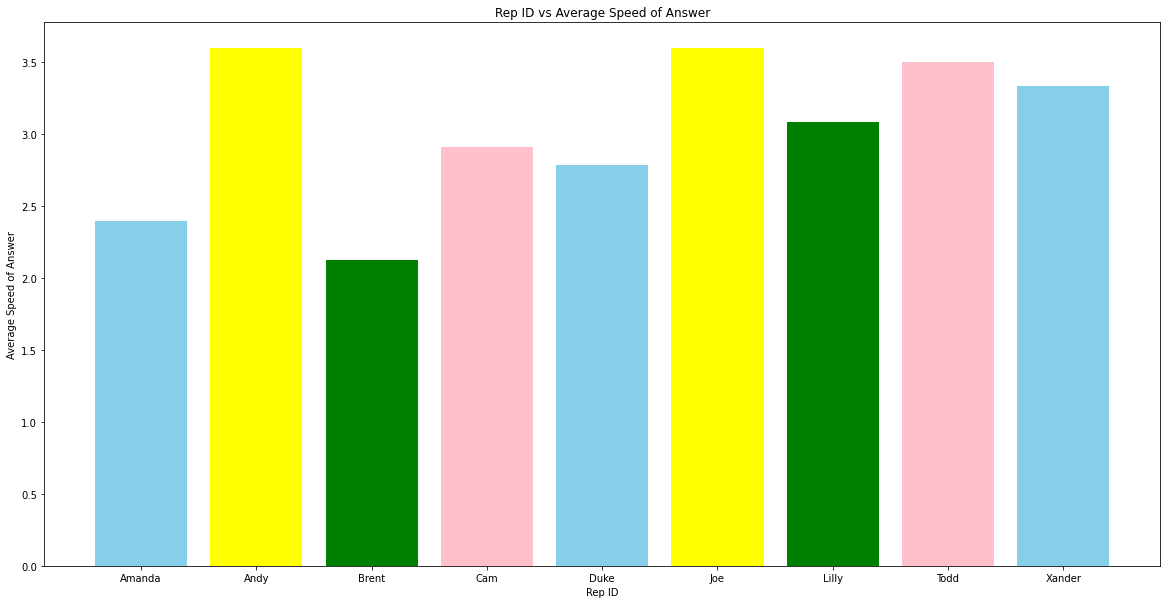

In [63]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(north_plt['Rep ID'],north_plt['Incoming Wait Time'],color = ['skyblue','yellow','green','pink'])
plt.title('Rep ID vs Average Speed of Answer')
plt.xlabel('Rep ID')
plt.ylabel('Average Speed of Answer')
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [60]:
#south CC
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()
quick_calls
quick_reps
quick_stats
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum()
total_stats

,Calls
Rep ID,
Alice,6
Eric,18
George,13
Helga,11
Josh,9
Karl,9
Kate,11
Randy,16
Sandy,13


<AxesSubplot:xlabel='Rep ID'>

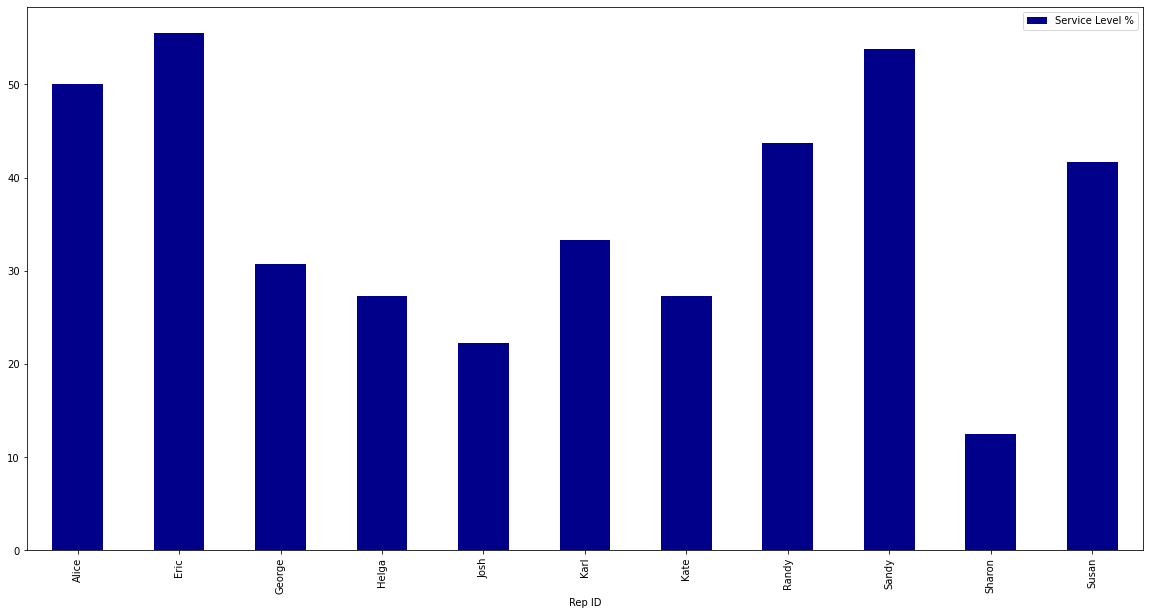

In [61]:
#south CC
#q2
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level
service_level.plot(y='Service Level %',kind='bar',color=['darkblue'])

Text(0, 0.5, 'Average Speed')

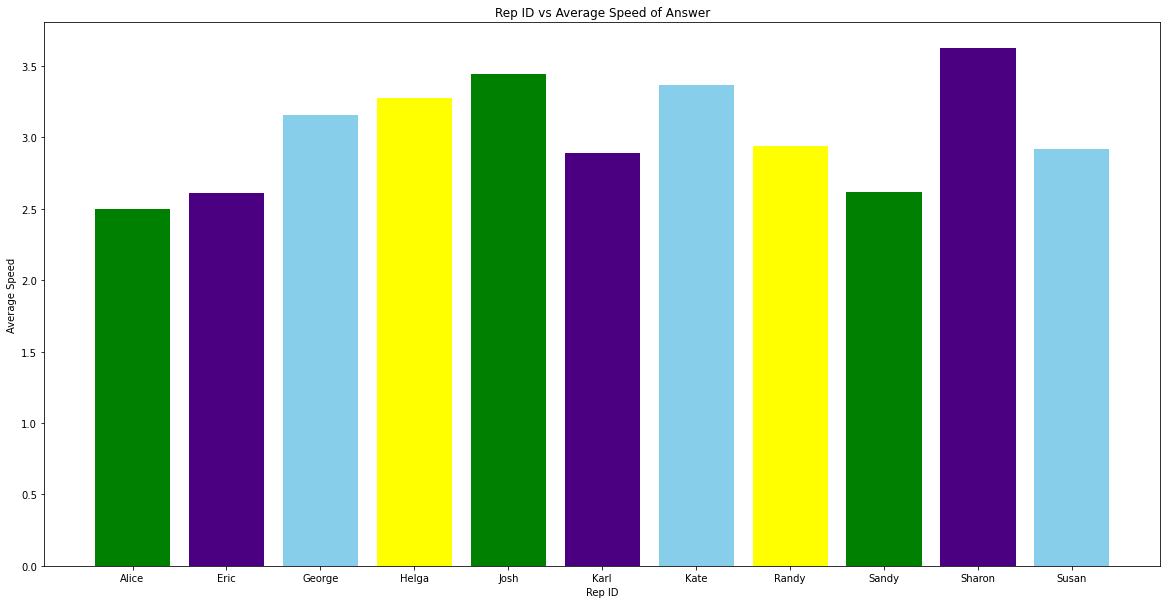

In [64]:
#south CC
#q2
south_df_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(south_df_plt['Rep ID'],south_df_plt['Incoming Wait Time'],color = ['green','indigo','skyblue','yellow'])
plt.title('Rep ID vs Average Speed of Answer')
plt.xlabel('Rep ID')
plt.ylabel('Average Speed')

In [65]:
#north CC
average_speed = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
average_speed

,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714
5,Joe,3.600000
6,Lilly,3.083333
7,Todd,3.500000
8,Xander,3.333333


In [66]:
#north CC
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()
quick_calls
quick_reps
quick_stats

#number of calls answered in less than 2 seconds

,Calls
Rep ID,
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Joe,2
Lilly,4
Todd,2
Xander,2


In [67]:
#north CC
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum()
total_stats



,Calls
Rep ID,
Amanda,5
Andy,10
Brent,8
Cam,11
Duke,14
Joe,10
Lilly,12
Todd,6
Xander,6


In [ ]:
#north CC
#Q2
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level
service_level.plot(y='Service Level %',kind='bar',color=['magenta','skyblue'])

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


([<matplotlib.axis.XTick at 0x7fb369632490>,
 [Text(0, 0, 'Outgoing'), Text(1, 0, 'Incoming')])

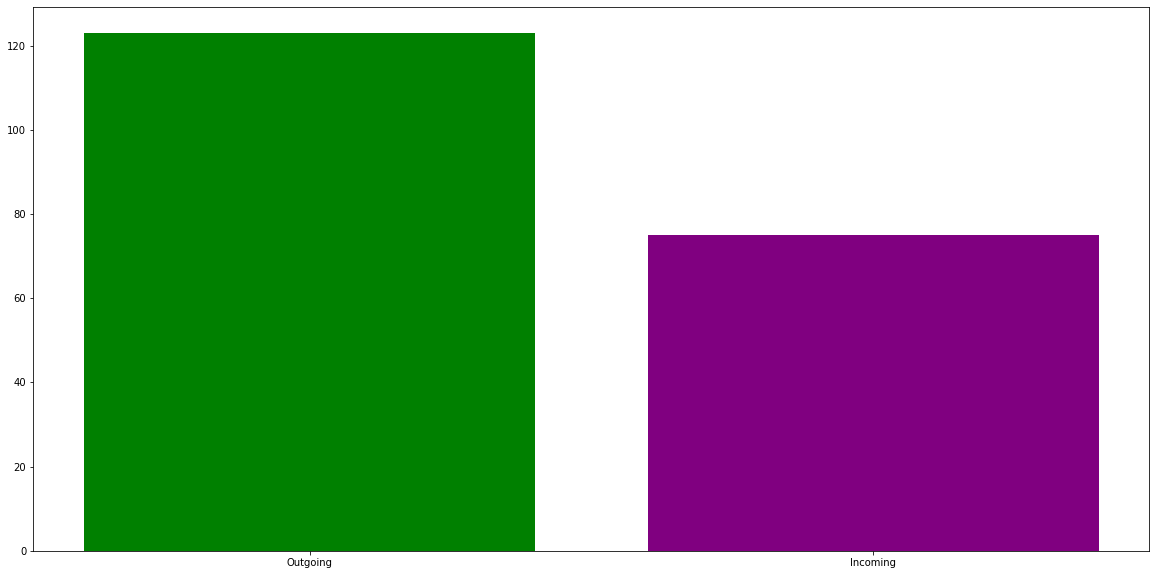

In [73]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group= whole.groupby('Call Purpose')
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


call_purpose=['Complaint','Product Support','Sales Support']
purpose_counts=purpose_group['Incoming or Outgoing'].value_counts()
print(purpose_counts)

#purpose_counts = whole["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

plt.bar(range(len(complaints)), list(complaints.values()), align='center',color='purple')
plt.xticks(range(len(complaints)), list(complaints.keys()))
plt.show

plt.bar(range(len(sales_support)), list(sales_support.values()), align='center',color=['green','purple'])
plt.xticks(range(len(sales_support)), list(sales_support.keys()))


In [72]:
#Q3
outgoing_add={'Outgoing':0}
complaints.update(outgoing_add)
complaints

{'Incoming': 51, 'Outgoing': 0}

([<matplotlib.axis.XTick at 0x7fb369686a00>], [Text(0, 0, 'Incoming')])

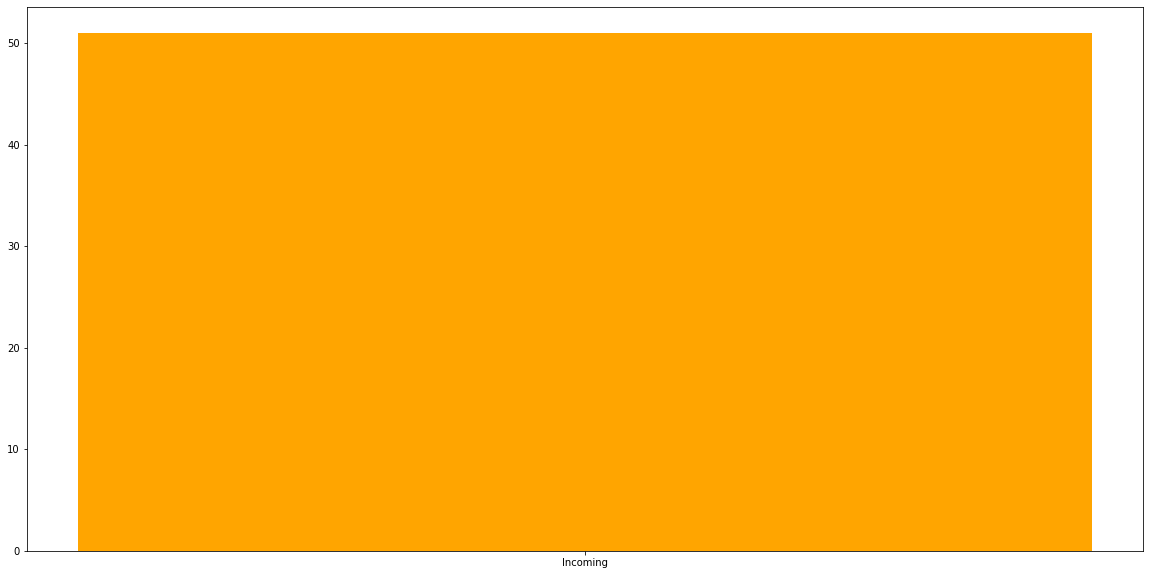

In [74]:
#Q3
plt.bar(range(len(complaints)), list(complaints.values()), align='center',color=['orange','blue'])
plt.xticks(range(len(complaints)), list(complaints.keys()))

([<matplotlib.axis.XTick at 0x7fb348044430>,
 [Text(0, 0, 'Outgoing'), Text(1, 0, 'Incoming')])

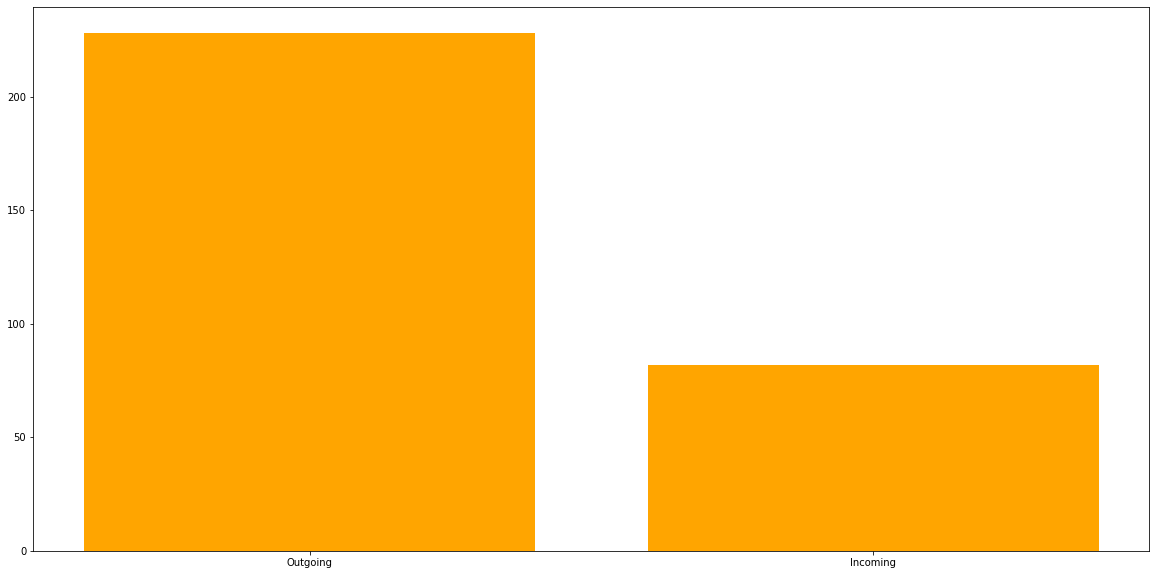

In [75]:
#Q3
plt.bar(range(len(product_support)), list(product_support.values()), align='center',color='orange')
plt.xticks(range(len(product_support)), list(product_support.keys()))

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

- I think that the north is more effiecnt beause they had more people than the south with higher average speed of answer. 

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
The north branch would benefit from the extra help
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
The duration of the wait when the customers hung up

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
